In [2]:
%%html 

<marquee style = 'color: green;'><b> Welcome to my awesome notebook for Hamoye  Stage A. I'm learning a lot !</b></marquee>

##  Import libraries

In [80]:
import numpy as np
import pandas as pd
from statistics import mean
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt

##  Preprocess data

In [3]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'

In [4]:
fuel_data_df = pd.read_csv(url, error_bad_lines=False)


In [5]:
fuel_data_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


###  Question 3
Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [6]:
#lets's see the two frames (columns) in question

question_3 = fuel_data_df[['fuel_type_code_pudl', 'fuel_cost_per_unit_burned']]

In [7]:
question_3

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,18.59
1,coal,18.58
2,coal,39.72
3,coal,47.21
4,gas,2.77
...,...,...
29518,gas,4.78
29519,gas,3.65
29520,gas,4.77
29521,coal,3.06


In [42]:
#let's know the individual fuel types

question_3['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [48]:
#let's locate the cost per unit gas burned

gas = question_3.loc[question_3['fuel_type_code_pudl'] == 'gas', 'fuel_cost_per_unit_burned']
print(gas)

4        2.77
10       1.94
12       1.94
28       2.49
30       2.69
         ... 
29515    8.33
29518    4.78
29519    3.65
29520    4.77
29522    0.00
Name: fuel_cost_per_unit_burned, Length: 11486, dtype: float64


In [54]:
mean(gas)

13.659396569737071

In [55]:
#let's locate the cost per unit coal burned

coal = question_3.loc[question_3['fuel_type_code_pudl'] == 'coal', 'fuel_cost_per_unit_burned']
print(coal)

0        18.590
1        18.580
2        39.720
3        47.210
5        44.240
          ...  
29503    26.775
29510    14.760
29516    14.760
29517    13.690
29521     3.060
Name: fuel_cost_per_unit_burned, Length: 8547, dtype: float64


In [56]:
mean(coal)

67.42182999882999

In [57]:
#let's locate the cost per unit oil burned

oil = question_3.loc[question_3['fuel_type_code_pudl'] == 'oil', 'fuel_cost_per_unit_burned']
print(oil)

14        32.130
19        33.321
21        30.319
23        32.184
25        32.186
          ...   
29502     88.553
29505    101.330
29506     95.530
29507     98.180
29514      0.000
Name: fuel_cost_per_unit_burned, Length: 8064, dtype: float64


In [58]:
mean(oil)

168.87708568948412

In [59]:
#let's locate the cost per unit nuclear burned

nuclear = question_3.loc[question_3['fuel_type_code_pudl'] == 'nuclear', 'fuel_cost_per_unit_burned']
print(nuclear)

6           28.770
45       40803.000
52          44.000
53          41.310
54          37.510
           ...    
29177        0.000
29187        0.000
29318        0.606
29390       49.494
29395       51.175
Name: fuel_cost_per_unit_burned, Length: 818, dtype: float64


In [60]:
mean(nuclear)

4955.1570024449875

In [61]:
#let's locate the cost per unit waste burned

waste = question_3.loc[question_3['fuel_type_code_pudl'] == 'waste', 'fuel_cost_per_unit_burned']
print(waste)

49        34.180
230       25.190
431        9.325
433        6.682
434      -35.100
          ...   
29172     13.664
29191    103.568
29192    132.291
29416     38.000
29477     22.113
Name: fuel_cost_per_unit_burned, Length: 441, dtype: float64


In [62]:
mean(waste)

19.518122448979593

####  gas = 13.6, coal = 67.4, oil = 168.8, nuclear = 4955.1, waste = 19.5
####  Lowest = gas

###  Question 4
What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [26]:
#using the describe function

fuel_data_df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


#### std = 10.60, 75% = 17.00

###  Question 5
What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [30]:
#using the skew and kurtosis function respectively

skew(fuel_data_df['fuel_qty_burned'])

15.850690077422112

In [31]:
kurtosis(fuel_data_df['fuel_qty_burned'])

651.2589365474387

###  Question 6
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?

In [71]:
#the isnull funcion and sum function together, as seen in lesson 4 - Data Types and Data Wrangling, can show the total of unavalable data in the df

fuel_data_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [36]:
#recall total number of rows = 29 523

percent_of_missing_rows = (180/29523) * 100
print(percent_of_missing_rows)

0.609694136774718


####  Feature: fuel_unit, Total: 180, % = 0.609

###  Question 8
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?








In [24]:
fuel_data_df.tail()



,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [5]:
#using the corr function

fuel_data_df[fuel_data_df.columns[1:]].corr()['fuel_cost_per_unit_burned'][:]

utility_id_ferc1               -0.037863
report_year                     0.013599
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_unit_burned       1.000000
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
Name: fuel_cost_per_unit_burned, dtype: float64

####  second and third lowest correlation =  -0.018535 and -0.010034
#### which is `fuel_qty_burned` and `fuel_mmbtu_per_unit` respectively

###  Question 9
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [20]:
#let's see the data in 1998

data_1998 = fuel_data_df.loc[fuel_data_df['report_year'] == 1998]
data_1998

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
4618,f1_fuel_1998_12_1_0_7,1,1998,rockport total aeg,coal,ton,4965881.0,17.198000,19.282,19.338,1.126
4619,f1_fuel_1998_12_1_0_10,1,1998,rockport total plant,coal,ton,10000938.0,17.196000,19.280,19.340,1.122
4620,f1_fuel_1998_12_4_0_1,4,1998,units 1 - 3,coal,ton,1974682.0,22.266000,26.550,26.540,1.190
4621,f1_fuel_1998_12_4_0_2,4,1998,units 1 - 3,gas,mcf,43048.0,1.031000,2.285,2.285,2.216
4622,f1_fuel_1998_12_4_0_4,4,1998,unit 4,coal,ton,385512.0,22.330000,26.550,26.540,1.190
...,...,...,...,...,...,...,...,...,...,...,...
5720,f1_fuel_1998_12_145_2_2,145,1998,fort lupton,oil,bbl,3206.0,5.427366,33.180,0.000,6.113
5721,f1_fuel_1998_12_145_2_3,145,1998,fort lupton,gas,mcf,439412.0,1.061000,2.509,0.000,2.364
5722,f1_fuel_1998_12_145_2_6,145,1998,fruita,gas,mcf,52091.0,0.991000,2.470,0.000,2.493
5723,f1_fuel_1998_12_145_2_9,145,1998,valmont 6,gas,mcf,347619.0,0.987000,2.413,0.000,2.445


In [23]:
#let's see the fuel cost per unit coal burned in 1998

data_1998.loc[data_1998['fuel_type_code_pudl'] == 'coal', 'fuel_cost_per_unit_burned']


4618    19.282
4619    19.280
4620    26.550
4622    26.550
4624    30.936
         ...  
5708    15.151
5710    21.055
5712    22.596
5714    14.035
5716    24.875
Name: fuel_cost_per_unit_burned, Length: 431, dtype: float64

In [26]:
#therefore, the percentage change in the fuel cost per unit burned in 1998

percent_change = ( (24.875 - 19.282)/19.282 ) * 100
percent_change

29.006327144487088

In [28]:
#let's see the fuel cost per unit coal burned in 1994

data_1994 = fuel_data_df.loc[fuel_data_df['report_year'] == 1994]

data_1994.loc[data_1994['fuel_type_code_pudl'] == 'coal', 'fuel_cost_per_unit_burned']


0       18.59
1       18.58
2       39.72
3       47.21
5       44.24
        ...  
1224    37.78
1227    38.23
1229    40.97
1230    39.95
1232    39.19
Name: fuel_cost_per_unit_burned, Length: 475, dtype: float64

In [29]:
#therefore, the percentage change in the fuel cost per unit burned in 1994

percent_change = ( (39.19 - 18.59)/18.59 ) * 100
percent_change

110.81226465841848

###  Question 10
Which year has the highest average fuel cost per unit delivered?

In [32]:
fuel_data_df[['report_year', 'fuel_cost_per_unit_delivered']]

,report_year,fuel_cost_per_unit_delivered
0,1994,18.53
1,1994,18.53
2,1994,38.12
3,1994,45.99
4,1994,2.77
...,...,...
29518,2018,4.78
29519,2018,3.65
29520,2018,4.77
29521,2018,14.76


In [38]:
fuel_data_df['report_year'].value_counts()
    
#!we can't possibly repeat what we did in question 3

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [79]:
#define a function to get average fuel cost per unit delivered for each year

def get_average_fcpud_for_year(index):
    fcpud_for_year = fuel_data_df.loc[fuel_data_df['report_year'] == index, 'fuel_cost_per_unit_delivered']
    return mean(fcpud_for_year)


In [78]:
#using a for loop, get average fuel cost per unit delivered for each year 

years_list = {}
for x in fuel_data_df['report_year']:
    year_id = x
    year_info = get_average_fcpud_for_year(x)
    
    years_list.update( {year_id:year_info} )
    if x == 2018:
        break
    
    
print(years_list)

{1994: 63.63605991902834, 1995: 32.735268942547876, 1996: 9196.705947610295, 1997: 11140.197239488118, 1998: 287.15442005420056, 1999: 25.551626666666667, 2000: 985.3628769118718, 2001: 60.050396017699114, 2002: 47.59436099585062, 2003: 55.66349298100743, 2004: 139.52427516778525, 2005: 41.43818439716312, 2006: 38.65748431214803, 2007: 43.32502294303797, 2008: 58.58819706840391, 2009: 652.6941628477905, 2010: 91.86210547184774, 2011: 59.77466693548387, 2012: 60.99450201126307, 2013: 172.3075913261051, 2014: 192.7371827497865, 2015: 326.53551052150044, 2016: 103.90176112185686, 2017: 46.19686102719033, 2018: 499.26996635120923}


####  From the result, 1997 seems to have the highest average fuel cost per unit delivered of `11 140`

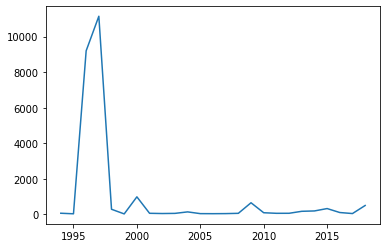

In [83]:
#let's try and plot this result
#first repackage data (result) into array-like for matplotlib

lists = sorted(years_list.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

#### Forgive me if the plot isn't pretty but I'm not in the data visualization/storytelling track :)

## Thank you for going through !